<a href="https://colab.research.google.com/github/vev1574/sberbank_data_analysis_06_07_21/blob/master/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22hw_numpy_vev%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [265]:
import numpy as np
import random
import time
import math


### Упражнение 1

На одном графике изобразите время затраченное на вычисление с использованием массивов numpy и стандартных списков в питоне.  
Для более точных результатов замеряйте время выполнения функции несколько раз и усредняйте. 
* Используйте функцию `z = 2*x**2 + 4*y`
* Перемножение матриц размера n на n

In [70]:
lt = list()
n=1000000
for size in range(100000, 1000000, 5000):
  test_list = [random.random() for i in range(size)]
  start = time.time()
  time.sleep(0.01)
  test_list = [i*n for i in test_list]
  lt.append(time.time() - start)

In [71]:
nptt = list()
n = 1000000
for size  in range(100000, 1000000, 5000):
  test_array = np.random.random_sample(size)
  start = time.time()
  time.sleep(0.01)
  test_array=test_array.dot(n)
  nptt.append(time.time()-start)  

Text(0.5, 1.0, 'Numpy rulez')

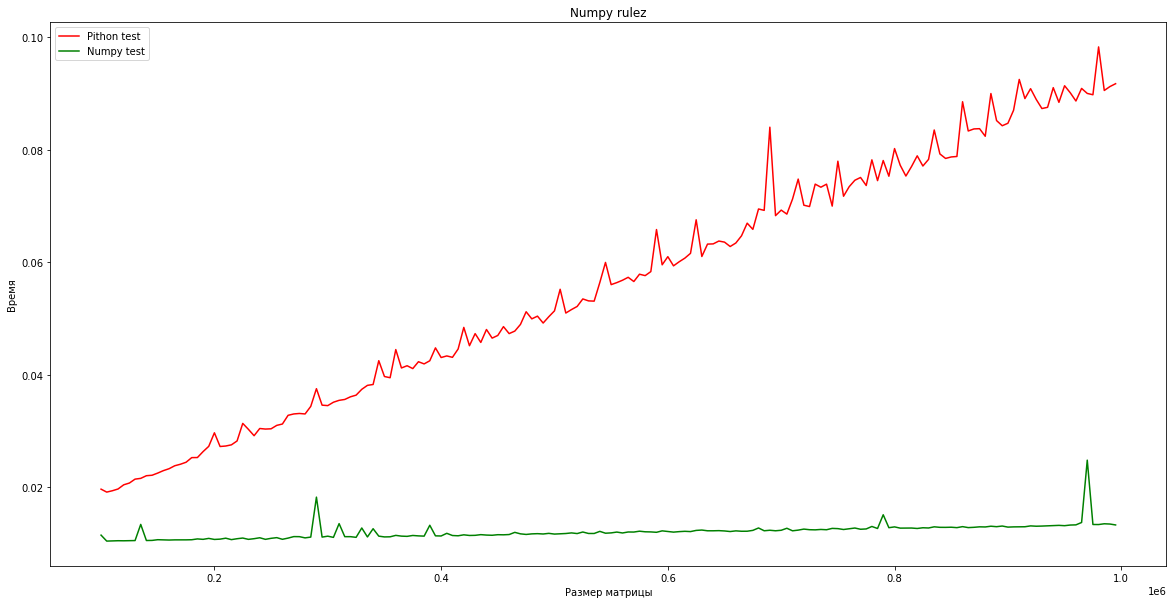

In [73]:
%matplotlib inline
plt.figure(figsize=(20,10))
X= list(range(100000, 1000000, 5000))
plt.plot(X, lt, color='red', label='Pithon test')
plt.plot(X, nptt, color='g', label='Numpy test')
plt.legend()
plt.xlabel('Размер матрицы')
plt.ylabel('Время')
plt.title('Numpy rulez')

### Упражнение 2
* Создайте массив чисел от 2 до 75. Выведите только нечётные. 
* Присвойте нечётным числам этого массива значение -1.



In [ ]:
A=np.arange(2,76)
print(A[1::2])
A[1::2]=-1
A#+++++++++++

[ 3  5  7  9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49
 51 53 55 57 59 61 63 65 67 69 71 73 75]


array([ 2, -1,  4, -1,  6, -1,  8, -1, 10, -1, 12, -1, 14, -1, 16, -1, 18,
       -1, 20, -1, 22, -1, 24, -1, 26, -1, 28, -1, 30, -1, 32, -1, 34, -1,
       36, -1, 38, -1, 40, -1, 42, -1, 44, -1, 46, -1, 48, -1, 50, -1, 52,
       -1, 54, -1, 56, -1, 58, -1, 60, -1, 62, -1, 64, -1, 66, -1, 68, -1,
       70, -1, 72, -1, 74, -1])

### Упражнение 3

* Найдите в документации функцию, которая удаляет из одного массива элементы, которые есть в другом. 
* Приведите примеры использования.

In [ ]:
arr1 = np.array([30,60,90,30,100])
arr2 = np.array([1,2,3,60,30])

data = np.setdiff1d(arr1, arr2, assume_unique=True)
# setdiff1d () Функция находит и представляет все элементы из 1-го массива, которых нет в 2-м массиве в соответствии с переданными параметрами.
print(data)
#+++++++++++

[ 90 100]


### Упражнение 4

* Создайте случайную квадратную матрицу случайного размера от 10 до 100. 
* Найдите максимум и сумму элементов.
* Поделите каждый элемент матрицы на максимум.
* Отнимите от каждой строки матрицы среднее по строке.
* Замените максимальное значение на -1.

In [4]:
d=round(np.random.sample()*90+10)
Z = np.round(100 * np.random.random((d, d)))
print('размерность', d,'x',d,'\n', Z,'\nMax', Z.max(),'Sum', Z.sum())
Z /= Z.max()
Z -= Z.mean(axis=1, keepdims=True)
Z[Z == Z.max()] = -1
#+++++++++++

размерность 57 x 57 
 [[70. 16.  7. ... 96. 13.  5.]
 [60. 32. 23. ... 71. 36. 18.]
 [25. 17. 36. ... 52. 90. 54.]
 ...
 [53. 66. 21. ... 61. 63. 29.]
 [ 4. 69. 17. ... 43. 94. 14.]
 [30. 67. 20. ... 66. 27.  3.]] 
Max 100.0 Sum 162130.0


### Упражнение 5
* Напишите функцию, которая берет многомерный вещественный массив с пропущенными значениями (np.nan) и возвращает его копию с заполненными пропусками (заменять средним значением всех элементов массива). Если в массиве одни пропущенные значения, заполните их нулями.

In [287]:
Az = np.array([[np.nan, np.nan], *[(x, x+5) for x in range(10) if x%2 ==0]])

def noNonex(Z):
  print(Z)
  Z[...]=np.where(np.all(np.isnan(Z)),0,Z)
  Z[np.isnan(Z)] = Z[~np.isnan(Z)].mean()
  return Z
noNonex(Az)

[[nan nan]
 [ 0.  5.]
 [ 2.  7.]
 [ 4.  9.]
 [ 6. 11.]
 [ 8. 13.]]


array([[ 6.5,  6.5],
       [ 0. ,  5. ],
       [ 2. ,  7. ],
       [ 4. ,  9. ],
       [ 6. , 11. ],
       [ 8. , 13. ]])

### Упражнение 6
* Напишите функцию которая нормализирует заданный numpy-массив, так чтобы его значения лежали в интервале $[0, 1]$.

In [5]:
def normix(Z):
  print(Z)
  Z =(Z-Z.min())/(Z.max()-Z.min())
  return Z
normix(Z)
#+++++++++++

[[ 0.1977193  -0.3422807  -0.4322807  ...  0.4577193  -0.3722807
  -0.4522807 ]
 [ 0.06350877 -0.21649123 -0.30649123 ...  0.17350877 -0.17649123
  -0.35649123]
 [-0.28947368 -0.36947368 -0.17947368 ... -0.01947368  0.36052632
   0.00052632]
 ...
 [-0.00350877  0.12649123 -0.32350877 ...  0.07649123  0.09649123
  -0.24350877]
 [-0.45912281  0.19087719 -0.32912281 ... -0.06912281  0.44087719
  -0.35912281]
 [-0.14912281  0.22087719 -0.24912281 ...  0.21087719 -0.17912281
  -0.41912281]]


array([[0.77544298, 0.42582917, 0.3675602 , ..., 0.94377556, 0.40640618,
        0.35461154],
       [0.68855066, 0.50726942, 0.44900045, ..., 0.75976829, 0.53316674,
        0.41662881],
       [0.46001817, 0.40822353, 0.5312358 , ..., 0.63482508, 0.88084961,
        0.64777374],
       ...,
       [0.64516129, 0.72932758, 0.43798274, ..., 0.69695593, 0.70990459,
        0.48977737],
       [0.35018174, 0.77101318, 0.43434802, ..., 0.6026806 , 0.93287142,
        0.41492503],
       [0.55088596, 0.79043617, 0.48614266, ..., 0.78396184, 0.53146297,
        0.37607905]])

### Упражнение 7
* Запишите numpy-array в файл.
* Считайте numpy-array из файла.

In [ ]:
np.save('example/example_1', b)
b = np.load('example/example_1.npy')#++++++++++++

### Упражнение 8
* Создайте случайный массив
* Найдите в массиве элемент ближайший к данному

In [11]:

Z = np.arange(100)
v = np.random.uniform(0,100)
index = (np.abs(Z-v)).argmin()
print(v, Z[index])#+++++++++++

92.87708120274247 93


### Упражнение 9

* Напишите функцию, которая возвращает  $n \times m$ целочисленную матрицу с заданным значением на границах матрицы и с заданным значением внутри

In [412]:
def matrix(n, m, a, b):
  Z = np.ones((n,m))
  Z[:]=a
  Z[1:-1,1:-1] = b
  return Z
matrix(7,8,0,3)#+++++++++++

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 3., 3., 3., 3., 3., 3., 0.],
       [0., 3., 3., 3., 3., 3., 3., 0.],
       [0., 3., 3., 3., 3., 3., 3., 0.],
       [0., 3., 3., 3., 3., 3., 3., 0.],
       [0., 3., 3., 3., 3., 3., 3., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

### Упражнение 10
* Напишите функцию, которая сортирует строки данной матрицы по значениям заданного столбца в порядке убывания. 

In [414]:
def sortix(Z, n):
  print(Z)
  return Z[-Z[:,-n].argsort()]
sortix(Z,1)#+++++++++++

[[-0.42535599 -0.35369775 -0.2820395  ...  0.9182361   0.00459348
  -0.69407441]
 [ 0.10404226  0.03238401 -0.03927423 ...  0.10404226  0.67730822
   0.19361507]
 [-0.35898025 -0.14400551  0.17845659 ... -0.48438218 -0.16192007
   0.12471291]
 ...
 [-0.81947634  0.32705558  0.70326137 ... -0.21038126 -0.29995407
  -0.31786863]
 [ 0.00597152  0.57923748  0.41800643 ...  0.32843362 -0.87184198
   0.38217731]
 [-0.30408819 -0.37574644 -0.6265503  ... -0.46531925  0.14377584
  -0.17868627]]


array([[-0.30523656, -0.93224621,  0.55466238, ..., -0.30523656,
        -0.07234727, -0.35898025],
       [-0.03559945,  0.01814424, -0.48346348, ...,  0.84221406,
         0.19728985,  0.43017915],
       [ 0.01355076,  0.06729444, -0.07602205, ..., -0.86426275,
        -0.86426275, -0.05810749],
       ...,
       [-0.31074874, -0.31074874, -0.48989435, ..., -0.61529628,
        -0.31074874, -0.59738172],
       [-0.63895269,  0.04180064, -0.78226918, ...,  0.22094626,
        -0.20900322,  0.2926045 ],
       [-0.2776757 ,  0.92259991, -0.0447864 , ..., -0.18810289,
         0.06270096, -0.76136886]])

### Упражнение 11

* Напишите функцию, которая создает двоичную матрицу шахматной доски с заданным shape

Пример 4x4:
```python
[[0, 1, 0, 1],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [1, 0, 1, 0]]
```

In [415]:
def chessix(m, n):
  A = np.zeros((m,n), dtype=int)
  A[1::2,::2] = 1
  A[::2,1::2] = 1
  return A
chessix(7, 8)#+++++++++++

array([[0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0],
       [0, 1, 0, 1, 0, 1, 0, 1]])

### Упражнение 12
* Напишите игру [life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life), используя массивы numpy.
* Визуализируйте интерактивно ее результаты.



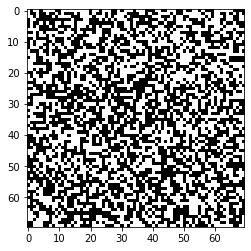

In [166]:
import matplotlib.pyplot as plt

def iterate(Z):
    N = (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
         Z[1:-1,0:-2]                + Z[1:-1,2:] +
         Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])

    birth = (N == 3) & (Z[1:-1,1:-1]==0)
    survive = ((N == 2) | (N == 3)) & (Z[1:-1,1:-1] == 1)
    Z[...] = 0
    Z[1:-1,1:-1][birth | survive] = 1
    return Z
s=1
Z = np.random.randint(0,2,(70,70))
plt.imshow(-Z, cmap='gray')

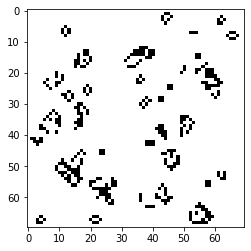

In [290]:
    plt.imshow(-Z, cmap='gray')
    # s +=1
    # plt.title('поколение',s)
    Z = iterate(Z)    